In [94]:
import pandas as pd

# cargamos el dataset
df = pd.read_csv('cleaned_dataset.csv')

# mostramos las primeras filas
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,1,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,1,0,0


In [95]:
# mostramos información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4981 non-null   int64  
 1   age                             4981 non-null   float64
 2   hypertension                    4981 non-null   int64  
 3   heart_disease                   4981 non-null   int64  
 4   ever_married                    4981 non-null   int64  
 5   Residence_type                  4981 non-null   int64  
 6   avg_glucose_level               4981 non-null   float64
 7   bmi                             4981 non-null   float64
 8   stroke                          4981 non-null   int64  
 9   work_type_Private               4981 non-null   int64  
 10  work_type_Self-employed         4981 non-null   int64  
 11  work_type_children              4981 non-null   int64  
 12  smoking_status_formerly smoked  49

================== RandomForest ==================
Accuracy: 0.9077231695085256
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       947
           1       0.15      0.18      0.16        50

    accuracy                           0.91       997
   macro avg       0.55      0.56      0.56       997
weighted avg       0.92      0.91      0.91       997



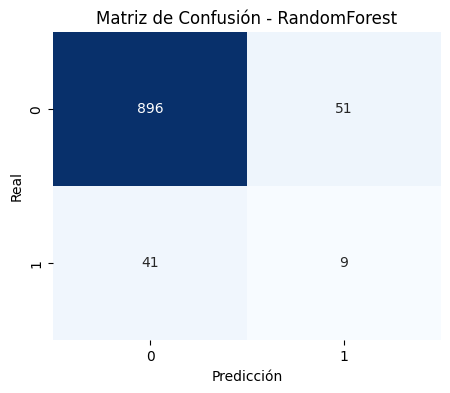

================== XGBoost ==================
Accuracy: 0.9067201604814443
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       947
           1       0.12      0.14      0.13        50

    accuracy                           0.91       997
   macro avg       0.54      0.54      0.54       997
weighted avg       0.91      0.91      0.91       997



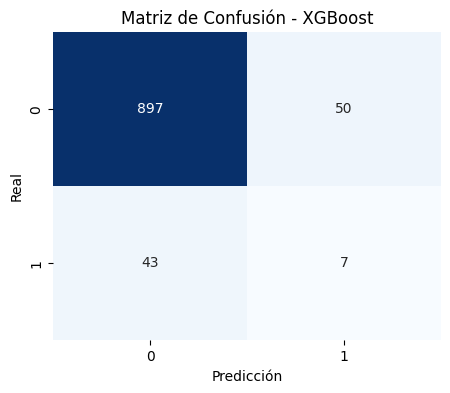

================== SVM ==================
Accuracy: 0.7352056168505516
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       947
           1       0.14      0.80      0.23        50

    accuracy                           0.74       997
   macro avg       0.56      0.77      0.54       997
weighted avg       0.94      0.74      0.81       997



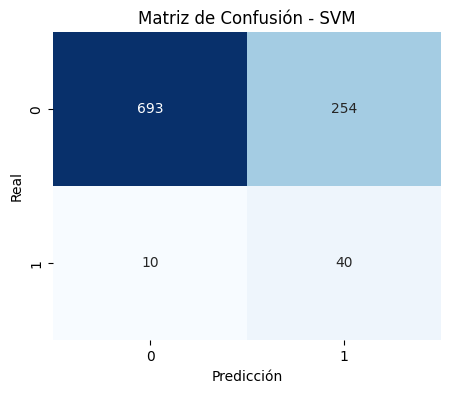

================== LogisticRegression ==================
Accuracy: 0.8365095285857572
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       947
           1       0.13      0.40      0.20        50

    accuracy                           0.84       997
   macro avg       0.55      0.63      0.55       997
weighted avg       0.92      0.84      0.87       997



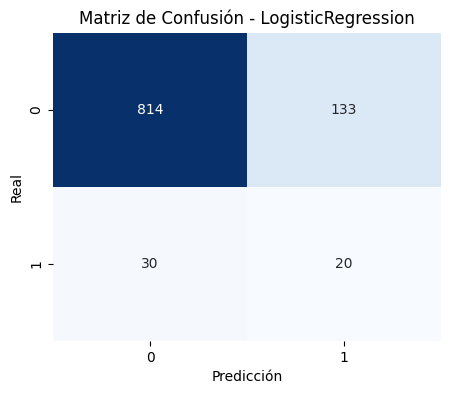

================== KNN ==================
Accuracy: 0.8114343029087262
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       947
           1       0.11      0.38      0.17        50

    accuracy                           0.81       997
   macro avg       0.54      0.61      0.53       997
weighted avg       0.92      0.81      0.86       997



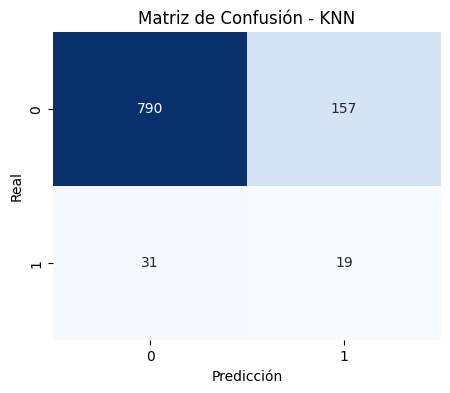

================== GradientBoosting ==================
Accuracy: 0.8555667001003009
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       947
           1       0.14      0.36      0.20        50

    accuracy                           0.86       997
   macro avg       0.55      0.62      0.56       997
weighted avg       0.92      0.86      0.88       997



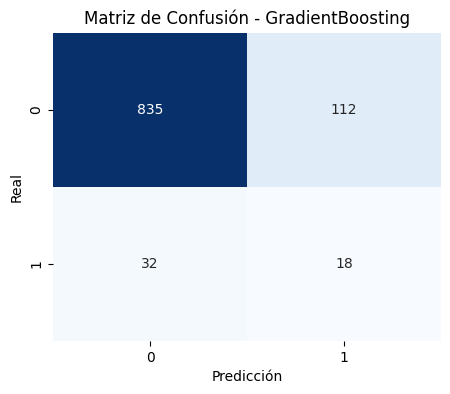

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

# dividimos el dataset en características (X) y target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# usamos SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# definimos los modelos a utilizar
models = {
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# entrenamos y evaluamos cada modelo con métricas
metrics_list = []

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"================== {name} ==================")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # mostramos matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

In [97]:
# mostramos tabla ordenada por F1 Score
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("================== Comparación de modelos ==================")
print(metrics_df)

================== Comparación de modelos ==================
                Model  Accuracy  Precision  Recall  F1 Score
0                 SVM  0.735206   0.136054    0.80  0.232558
1    GradientBoosting  0.855567   0.138462    0.36  0.200000
2  LogisticRegression  0.836510   0.130719    0.40  0.197044
3                 KNN  0.811434   0.107955    0.38  0.168142
4        RandomForest  0.907723   0.150000    0.18  0.163636
5             XGBoost  0.906720   0.122807    0.14  0.130841


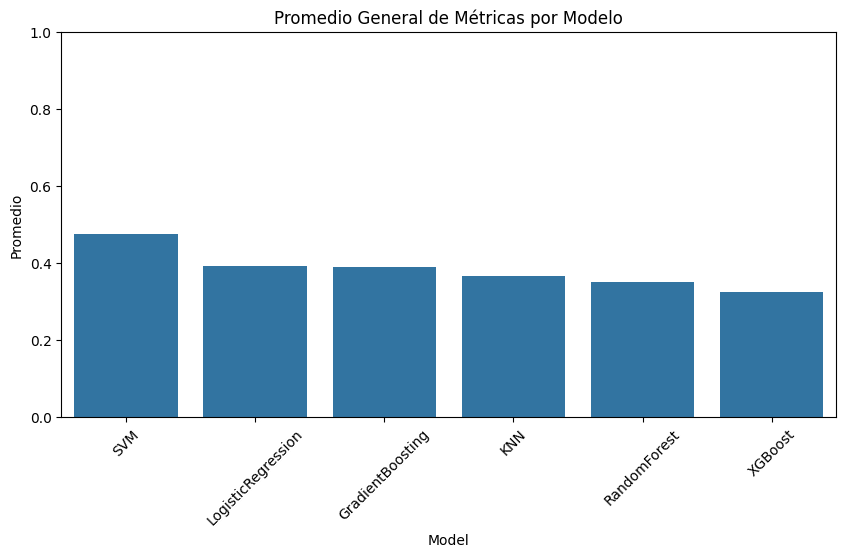

In [98]:
# añadimos nueva columna con la media de las métricas principales en la tabla de comparación
metrics_df['Average'] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).round(3)

# ordenamos por la media
metrics_df = metrics_df.sort_values(by='Average', ascending=False).reset_index(drop=True)

# mostramos la media en un barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='Average')
plt.title("Promedio General de Métricas por Modelo")
plt.ylim(0, 1)
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.show()
